# Image segmentation with StarDist

StarDist is a deep-learning based image segmentation method for segmenting objects such as cell nuclei.

```
pip install tensorflow==2.5.2 stardist==0.9.1
```

See also
* [StarDist in Proceedings of MICCAI 2018](https://link.springer.com/chapter/10.1007/978-3-030-00934-2_30)
* [StarDist on github](https://github.com/stardist/stardist)
* [StarDist NEUBIAS Academy webinar](https://www.youtube.com/watch?v=Amn_eHRGX5M)
* [StarDist prediction example](https://github.com/stardist/stardist/blob/master/examples/2D/3_prediction.ipynb)

As usual, we start by loading an example image.

In [1]:
from stardist.models import StarDist2D
from csbdeep.utils import normalize
from stardist import random_label_cmap

import stackview
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import human_mitosis
from skimage.io import imread

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
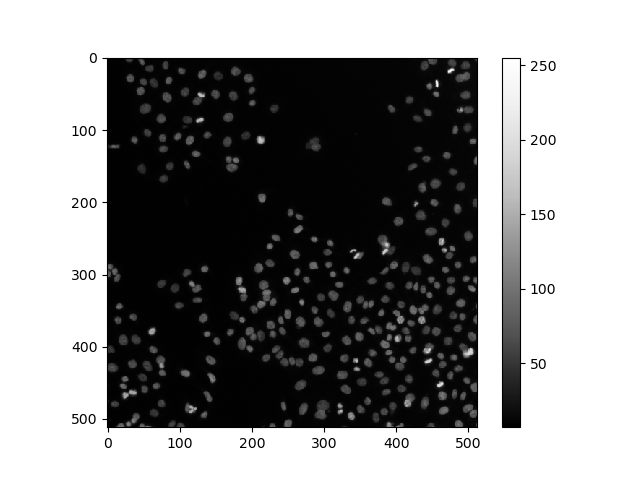
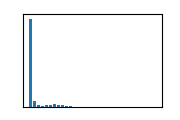

In [2]:
image = human_mitosis()
stackview.insight(image)

## Loading a model
Models are files that typically contain a neural network which is capable of segmenting an image. StarDist comes with some pretrained models for demonstrating how the algorithm performs on a general use-case such as nuclei segmentation. If such a pretrained model does not perform well on your data (be a good scientist and check that carefully!), you need to [train your own model](https://github.com/stardist/stardist/blob/master/examples/2D/2_training.ipynb) which fits to your data. For training, you will likely need a powerful GPU, for applying a model (prediction step) to a 2D image no GPU is necessary.

In [3]:
# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


## Normalizing the input image
Many algorithms using neural networks need normalized input data to work on. For example, you can determine the 1% and the 99.8% percentile (that's very commond) and normalize your image so that the intensities spread between these percentiles are afterwards in the range between 0 and 1. We need to do this because the model was trained on an image in this range and might not be able to segment images with different intensity ranges.

In [4]:
axis_norm = (0,1)
image = normalize(image, 1,99.8, axis=axis_norm)

Segmenting the image and labeling the individual objects is often called "instance segmentation" or "prediction" in the artificial intelligence community.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
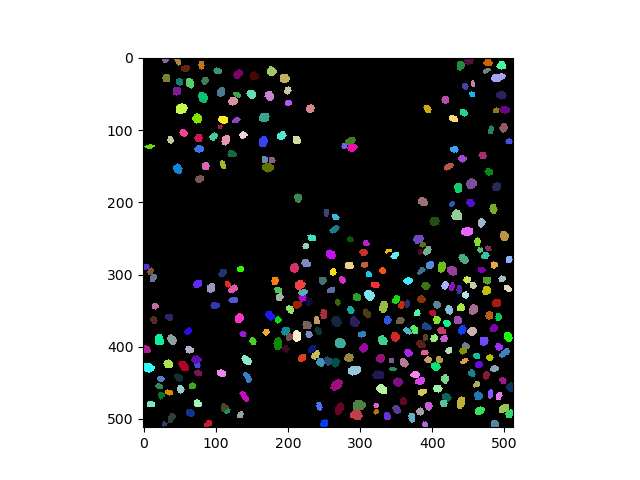

In [5]:
labels, details = model.predict_instances(image)

stackview.insight(labels)

In [6]:
details.keys()

dict_keys(['coord', 'points', 'prob'])

## Result visualization
Cell / nuclei segmentation results can be checked best if the resulting label image is overlaid to the original image

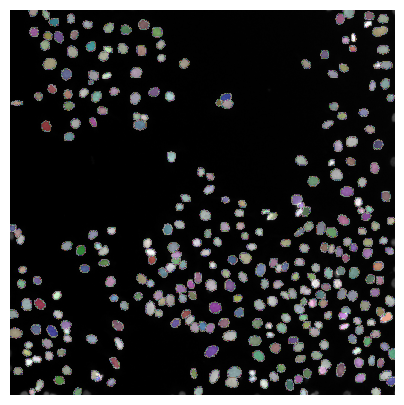

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(image, clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=random_label_cmap(), alpha=0.5)
plt.axis('off');

... or by drawing outlines around segmented regions.

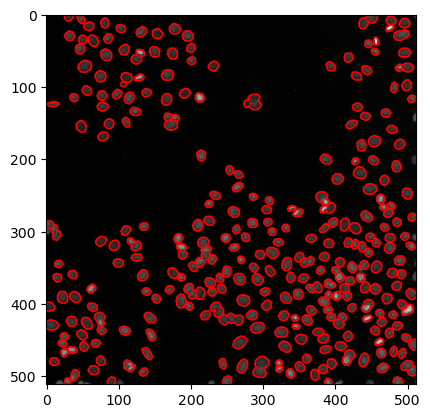

In [8]:
# create a new plot
fig, axes = plt.subplots(1,1)

# add two images
axes.imshow(image, cmap=plt.cm.gray)
axes.contour(labels, [0.5], linewidths=1.2, colors='r')

Note: The model we applied here to blobs.gif was not trained on it. The result doesn't look so bad though.

## More available pretrained models

StarDist offers more available pretrained models.

In [9]:
StarDist2D.from_pretrained() 

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


## Exercise
Apply the image to a histological image (Hematoxiline-Eosine staining) of lung pest ([source](https://commons.wikimedia.org/wiki/File:Histo_Lungenpest.jpg)).

StackViewNDArray([[[253, 163, 189],
                   [248, 157, 190],
                   [239, 144, 186],
                   ...,
                   [205,  71,  95],
                   [208,  79,  97],
                   [217,  93, 103]],

                  [[248, 151, 186],
                   [248, 149, 193],
                   [246, 146, 196],
                   ...,
                   [224,  77,  93],
                   [211,  73,  86],
                   [207,  77,  87]],

                  [[253, 152, 194],
                   [254, 152, 200],
                   [254, 149, 205],
                   ...,
                   [188,  84,  75],
                   [181,  73,  70],
                   [184,  71,  73]],

                  ...,

                  [[255, 240, 241],
                   [255, 240, 250],
                   [255, 241, 254],
                   ...,
                   [255, 235, 245],
                   [255, 227, 241],
                   [255, 237, 254]],

                  [[255, 241, 244],
                   [255, 241, 251],
                   [255, 242, 255],
                   ...,
                   [255, 244, 255],
                   [255, 227, 245],
                   [255, 239, 255]],

                  [[255, 241, 244],
                   [255, 242, 252],
                   [255, 242, 255],
                   ...,
                   [255, 234, 250],
                   [241, 209, 230],
                   [255, 223, 247]]], dtype=uint8)
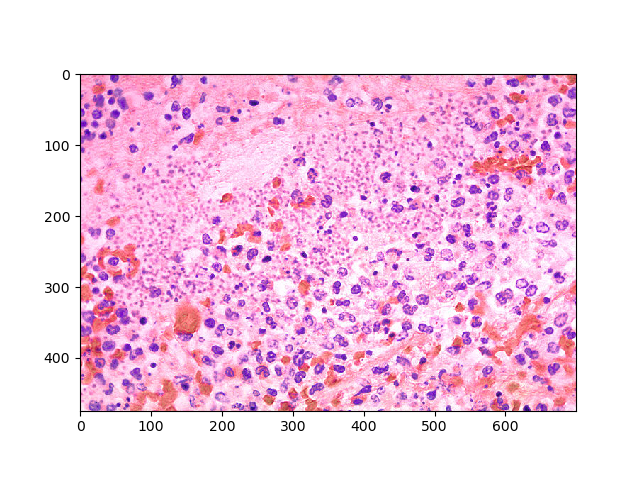
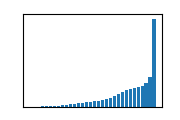

In [10]:
image_lung = imread("data/Histo_Lungenpest.jpg")
stackview.insight(image_lung)